# **Import Required Libraries/Modules**

In [ ]:
# Import Libraries
from datetime import datetime #=> date time conversion on dataframe
import datetime as dt
import re

# Dataframe
import pandas as pd
 
# Numerical
import numpy as np
import math
from math import sqrt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


# Evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import rcParams
import seaborn as sns 

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

pd.options.mode.chained_assignment = None #https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

# **Load Data OHLC**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date']) 

In [ ]:
df

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
0,2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577
1,2019-07-31,660.0,685.0,660.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003
2,2019-08-01,660.0,685.0,660.0,665.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122
3,2019-08-04,665.0,670.0,645.0,655.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386
4,2019-08-05,655.0,655.0,630.0,640.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029
791,2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134
792,2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826
793,2022-10-26,1150.0,1165.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.921665,0.921665,0.921665


In [ ]:
df.isnull().values.any() #Check NaN

False

In [ ]:
df.isnull().sum() #8 rows NaN

Date                0
Open                0
High                0
Low                 0
Close               0
Inflasi             0
Kurs                0
M2                  0
Vix Open            0
Vix High            0
Vix Low             0
Vix Close           0
ROE                 0
NPM                 0
PER                 0
Sentiment_Perang    0
Sentiment_Resesi    0
Sentiment_BBM       0
dtype: int64

In [ ]:
# Drop NaN Values
df = df.dropna() # Drop menghindari missing values
df #2185-7 = 2177

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
0,2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577
1,2019-07-31,660.0,685.0,660.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003
2,2019-08-01,660.0,685.0,660.0,665.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122
3,2019-08-04,665.0,670.0,645.0,655.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386
4,2019-08-05,655.0,655.0,630.0,640.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029
791,2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134
792,2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826
793,2022-10-26,1150.0,1165.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.921665,0.921665,0.921665


In [ ]:
# Look START and END date of stock price data
start_from = np.min(df['Date'])
end = np.max(df['Date'])
print(f'{start_from} until {end}.')

2019-07-30 00:00:00 until 2022-10-27 00:00:00.


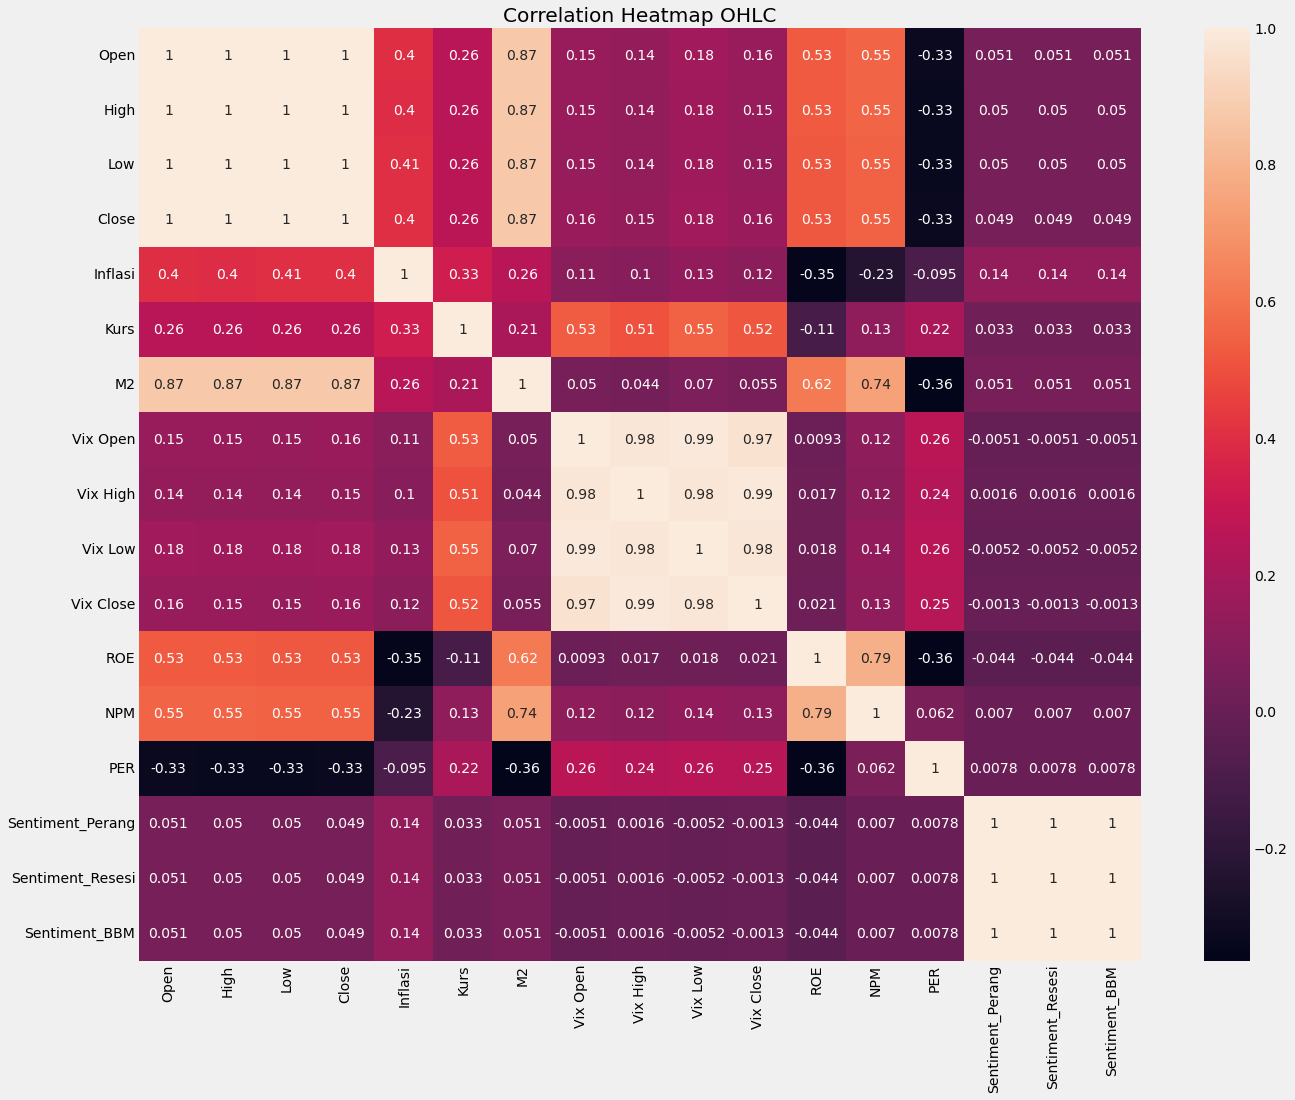

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap OHLC') 
plt.show()  #Drop AdjClose and Volume

### Line Plot

In [ ]:
def get_date(df, start, end):
  '''
  Slicing dataframe
  '''
  date_format = '%Y-%m-%d'
  start_date = pd.to_datetime(start)
  end_date = pd.to_datetime(end)
  sliced_df = df[(df['Date']>=start_date) & (df['Date']<=end_date)]
  print(f"Starts from {np.min(sliced_df['Date'])} until {np.max(sliced_df['Date'])}.")
  return sliced_df

def visualize(df, variable):
  '''
  Fungsi untuk memvisualisasikan satu variabel saja
  matplotlib.pyplot as plt
  '''
  plt.figure(figsize=(10,4)) # Formatting ukuran
  plt.plot(df['Date'], df[variable], c='orange')
  plt.xlabel('Time')
  plt.ylabel('Value $')
  plt.title(variable)
  plt.show()


def multi_plot(df, figsize, combine_plot=False):
  '''
  Fungsi untuk memvisualisasikan OHLC secara terpisah 
  atau dikombinasikan

  Parameter:
    df = Tahun yang akan divisualisasikan
    combine_plot = memvisualisasikan OHLC dalam satu plot

  Output:
    if combine_plot == True, maka output OHLC ditampilkan dalam satu plot
    if combine_plot == False, maka output OHLC ditampilkan secara terpisah
  '''
  fig, ax = plt.subplots(2, 3, figsize=figsize)
  variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']
  colors = ['red', 'blue', 'purple', 'orange', 'green', 'brown', 'pink', 'gray', 'olive', 'cyan', 'yellow', 'lawngreen', 'lightgreen', 'navy', 'magenta', 'indigo', 'seagreen']
  index = 0
  for row in range(2):
    for col in range(2):
      ax[row][col].plot(df['Date'], df[variables[index]], c=colors[index])
      ax[row][col].set_xlabel('Time')
      ax[row][col].set_ylabel('Stock Price')
      ax[row][col].set_title(variables[index])
      index += 1

  fig.tight_layout()

  if combine_plot==True:
    plt.clf() # Delete visualisasi sebelumnya
    for variable, color in zip(variables, colors):
      plt.plot(df['Date'], df[variable].values, c=color, label=variable)
    plt.legend()
    plt.show()

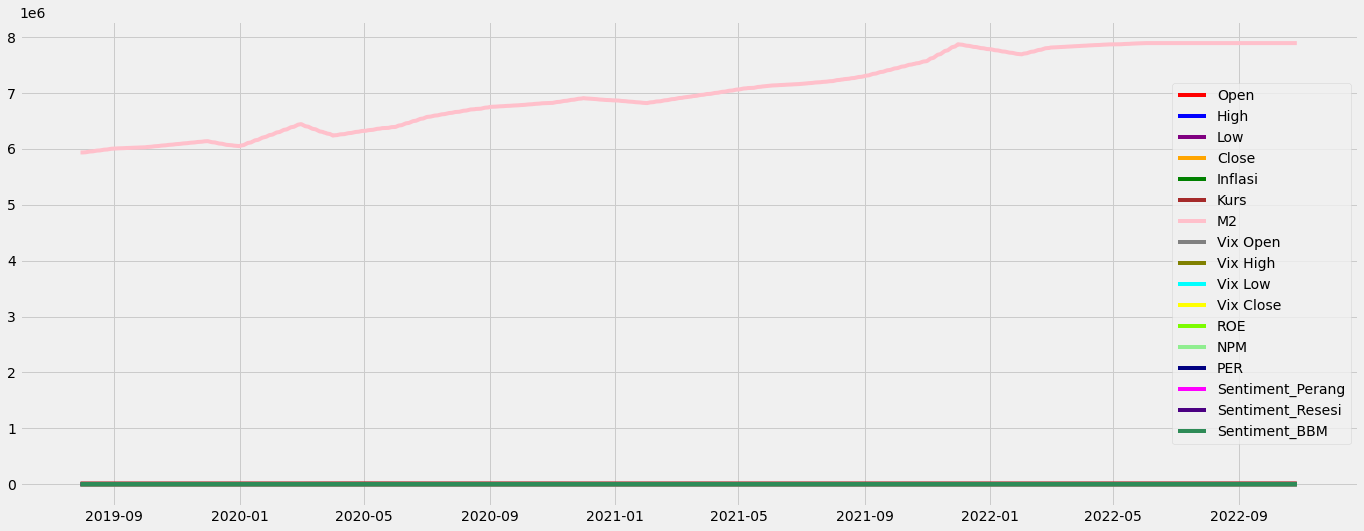

In [ ]:
# Plot OHLC (Open High Low Close) combine True
multi_plot(df, figsize=(20,8), combine_plot=True)

In [ ]:
def multi_plot(df, figsize, combine_plot=False):
  '''
  Fungsi untuk memvisualisasikan OHLC secara terpisah 
  atau dikombinasikan

  Parameter:
    df = Tahun yang akan divisualisasikan
    combine_plot = memvisualisasikan OHLC dalam satu plot

  Output:
    if combine_plot == True, maka output OHLC ditampilkan dalam satu plot
    if combine_plot == False, maka output OHLC ditampilkan secara terpisah
  '''
  fig, ax = plt.subplots(2, 2, figsize=figsize)
  variables = [ 'Close', 'Low']
  colors = ['red', 'blue']
  index = 0
  for row in range(1):
    for col in range(1):
      ax[row][col].plot(df['Date'], df[variables[index]], c=colors[index])
      ax[row][col].set_xlabel('Time')
      ax[row][col].set_ylabel('Stock Price')
      ax[row][col].set_title(variables[index])
      index += 1

  fig.tight_layout()

  if combine_plot==True:
    plt.clf() # Delete visualisasi sebelumnya
    for variable, color in zip(variables, colors):
      plt.plot(df['Date'], df[variable].values, c=color, label=variable)
    plt.legend()
    plt.show()

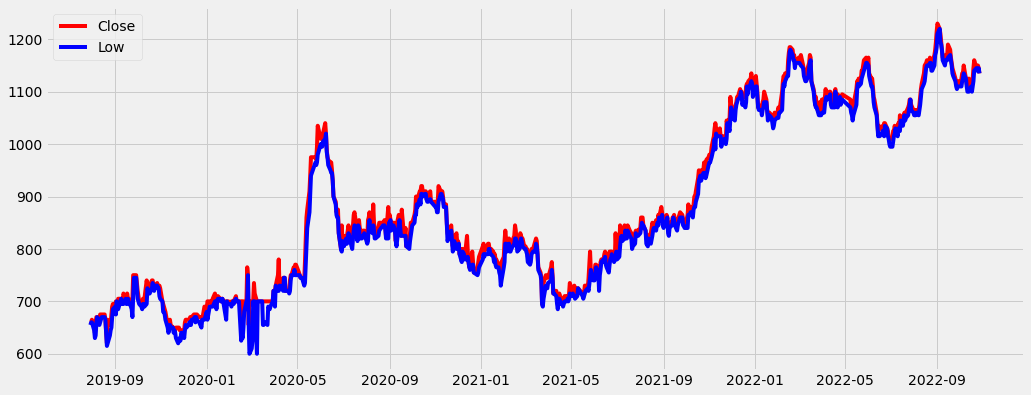

In [ ]:
# Plot OHLC (Open High Low Close) combine True
multi_plot(df, figsize=(15,6), combine_plot=True)

In [ ]:
def get_date(df, start, end):
  '''
  Slicing dataframe
  '''
  date_format = '%Y-%m-%d'
  start_date = pd.to_datetime(start)
  end_date = pd.to_datetime(end)
  sliced_df = df[(df['Date']>=start_date) & (df['Date']<=end_date)]
  print(f"Starts from {np.min(sliced_df['Date'])} until {np.max(sliced_df['Date'])}.")
  return sliced_df

def visualize(df, variable):
  '''
  Fungsi untuk memvisualisasikan satu variabel saja
  matplotlib.pyplot as plt
  '''
  plt.figure(figsize=(10,4)) # Formatting ukuran
  plt.plot(df['Date'], df[variable], c='orange')
  plt.xlabel('Time')
  plt.ylabel('Value $')
  plt.title(variable)
  plt.show()


def multi_plot(df, figsize, combine_plot=False):
  '''
  Fungsi untuk memvisualisasikan OHLC secara terpisah 
  atau dikombinasikan

  Parameter:
    df = Tahun yang akan divisualisasikan
    combine_plot = memvisualisasikan OHLC dalam satu plot

  Output:
    if combine_plot == True, maka output OHLC ditampilkan dalam satu plot
    if combine_plot == False, maka output OHLC ditampilkan secara terpisah
  '''
  fig, ax = plt.subplots(2, 3, figsize=figsize)
  variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']
  colors = ['red', 'blue', 'purple', 'orange', 'green', 'brown', 'pink', 'gray', 'olive', 'cyan', 'yellow', 'lawngreen', 'lightgreen', 'navy', 'magenta', 'indigo', 'seagreen']
  index = 0
  for row in range(2):
    for col in range(2):
      ax[row][col].plot(df['Date'], df[variables[index]], c=colors[index])
      ax[row][col].set_xlabel('Time')
      ax[row][col].set_ylabel('Stock Price')
      ax[row][col].set_title(variables[index])
      index += 1

  fig.tight_layout()

  if combine_plot==True:
    plt.clf() # Delete visualisasi sebelumnya
    for variable, color in zip(variables, colors):
      plt.plot(df['Date'], df[variable].values, c=color, label=variable)
    plt.legend()
    plt.show()

In [ ]:
variables = ['Date','Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']
dataset = df[variables]
train_index = int(0.8 * len(dataset))
train = dataset[:train_index]
test = dataset[train_index:]

In [ ]:
train

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
0,2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.000000,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577
1,2019-07-31,660.0,685.0,660.0,660.0,3.379130,14026.000000,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003
2,2019-08-01,660.0,685.0,660.0,665.0,3.386522,14098.000000,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122
3,2019-08-04,665.0,670.0,645.0,655.0,3.393913,14164.500000,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386
4,2019-08-05,655.0,655.0,630.0,640.0,3.401304,14231.000000,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2022-02-23,1170.0,1170.0,1145.0,1160.0,2.124444,14355.000000,7.791873e+06,28.040001,31.070000,27.200001,31.020000,0.909152,0.063032,18.969883,0.789785,0.789785,0.789785
632,2022-02-24,1160.0,1175.0,1155.0,1155.0,2.156667,14371.000000,7.798232e+06,37.500000,37.790001,29.450001,30.320000,0.896842,0.063120,19.762128,0.841638,0.841638,0.841638
633,2022-02-28,1155.0,1175.0,1155.0,1165.0,2.188889,14360.500000,7.804591e+06,32.439999,33.509998,28.430000,30.150000,0.884532,0.063209,20.554373,0.992008,0.992008,0.992008
634,2022-03-01,1165.0,1180.0,1155.0,1155.0,2.221111,14350.000000,7.810949e+06,17.600000,18.540001,16.559999,16.600000,0.872222,0.063297,21.346618,0.840256,0.840256,0.840256


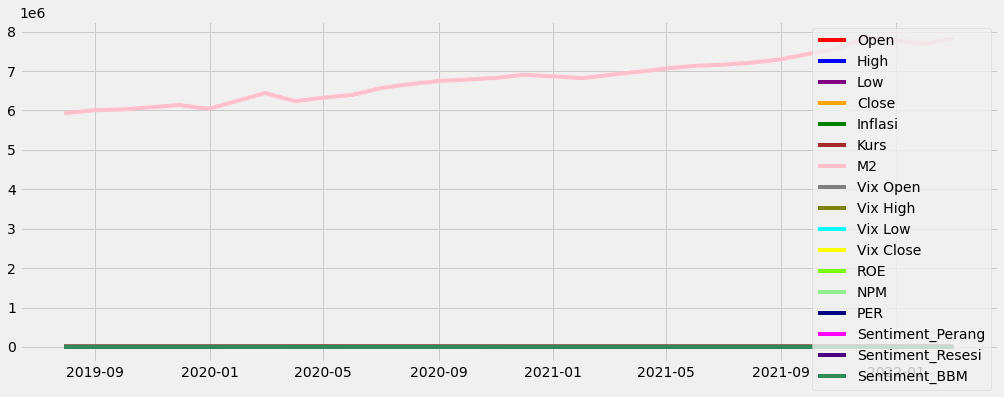

In [ ]:
# Plot OHLC (Open High Low Close) combine True
multi_plot(train, figsize=(15,6), combine_plot=True)

In [ ]:
test

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
636,2022-03-06,1170.0,1175.0,1145.0,1150.0,2.285556,14390.666667,7.813851e+06,24.910000,25.959999,24.760000,24.790001,0.847603,0.063475,22.931108,0.881947,0.881947,0.881947
637,2022-03-07,1150.0,1150.0,1130.0,1140.0,2.317778,14411.000000,7.815302e+06,24.385001,24.939999,23.220000,23.370001,0.835293,0.063563,23.723353,0.747963,0.747963,0.747963
638,2022-03-08,1140.0,1145.0,1125.0,1135.0,2.350000,14394.000000,7.816753e+06,23.860001,23.920000,21.680000,21.950001,0.822983,0.063652,24.515598,0.833130,0.833130,0.833130
639,2022-03-09,1135.0,1140.0,1120.0,1125.0,2.382222,14371.000000,7.818204e+06,25.652501,26.235000,23.775000,24.405001,0.810673,0.063741,25.307843,0.708237,0.708237,0.708237
640,2022-03-10,1125.0,1135.0,1120.0,1135.0,2.414444,14298.000000,7.819655e+06,27.445001,28.550000,25.869999,26.860001,0.798363,0.063829,26.100088,0.950632,0.950632,0.950632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029
791,2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134
792,2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826
793,2022-10-26,1150.0,1165.0,1145.0,1145.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.921665,0.921665,0.921665


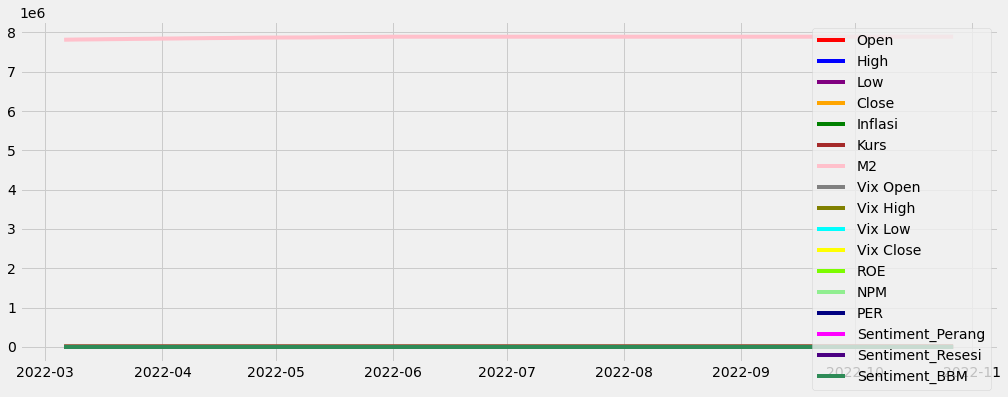

In [ ]:
# Plot OHLC (Open High Low Close) combine True
multi_plot(test, figsize=(15,6), combine_plot=True)

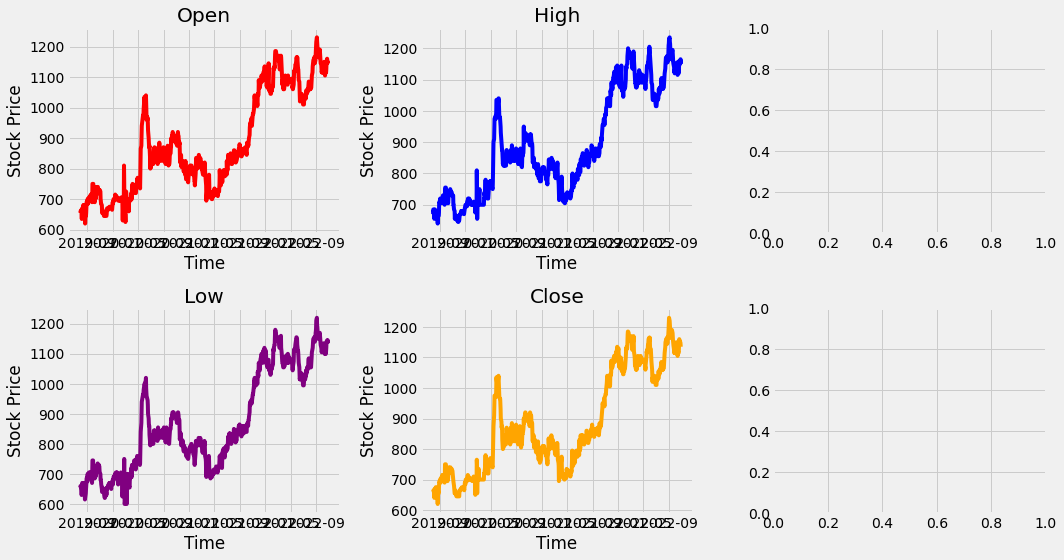

In [ ]:
# Plot OHLC (Open High Low Close) combine False
multi_plot(df, figsize=(15,8))

In [ ]:
# Extracting the series
print(f'{np.min(dataset.Date)} until {np.max(dataset.Date)}')
df = dataset.set_index('Date')

# Picking the multivariate series 
series = dataset[variables] 
print(series.shape)
print(series) #4 Rows

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 18)
          Date    Open    High     Low   Close   Inflasi     Kurs  \
0   2019-07-30   655.0   670.0   655.0   660.0  3.371739  14034.0   
1   2019-07-31   660.0   685.0   660.0   660.0  3.379130  14026.0   
2   2019-08-01   660.0   685.0   660.0   665.0  3.386522  14098.0   
3   2019-08-04   665.0   670.0   645.0   655.0  3.393913  14164.5   
4   2019-08-05   655.0   655.0   630.0   640.0  3.401304  14231.0   
..         ...     ...     ...     ...     ...       ...      ...   
790 2022-10-23  1160.0  1160.0  1145.0  1145.0  5.950000  15247.0   
791 2022-10-24  1145.0  1150.0  1140.0  1150.0  5.950000  15247.0   
792 2022-10-25  1150.0  1155.0  1140.0  1150.0  5.950000  15247.0   
793 2022-10-26  1150.0  1165.0  1145.0  1145.0  5.950000  15247.0   
794 2022-10-27  1145.0  1150.0  1135.0  1135.0  5.950000  15247.0   

               M2   Vix Open   Vix High    Vix Low  Vix Close       ROE  \
0    5.935133e+06  12.870000  14.180000 

In [ ]:
series

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
0,2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577
1,2019-07-31,660.0,685.0,660.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003
2,2019-08-01,660.0,685.0,660.0,665.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122
3,2019-08-04,665.0,670.0,645.0,655.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386
4,2019-08-05,655.0,655.0,630.0,640.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029
791,2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134
792,2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826
793,2022-10-26,1150.0,1165.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.921665,0.921665,0.921665


In [ ]:
print("train data ",f'{np.min(train.Date)} until {np.max(train.Date)}')
print("test data ",f'{np.min(test.Date)} until {np.max(test.Date)}')

train data  2019-07-30 00:00:00 until 2022-03-03 00:00:00
test data  2022-03-06 00:00:00 until 2022-10-27 00:00:00


# **Modeling 1 Linear Regression**



##Features OHLC

In [ ]:
def LinearRegressionModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Linear Regression model. 
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Predict the stock price using the Decision Tree Regressor model 
    preds_linreg =  linreg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_linreg)
    rmse = sqrt(mean_squared_error(y_test, preds_linreg))
    mae = mean_absolute_error(y_test, preds_linreg)
    r2 = r2_score(y_test, preds_linreg)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_linreg, linreg, variables, X_test, y_test

In [ ]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
train_index, mse, rmse, mae, r2, preds_linreg, linreg, variables, X_test, y_test = LinearRegressionModel(series)

X_train (636, 3)
y_train (636,)
X_test (159, 3)
y_test (159,)


MAE = 6.20765316234379
MSE = 62.252922177238865
RMSE = 7.890052102314589
R-Squared Score = 0.9747049523884388


In [ ]:
#Persamaan Regresi
print("Close (Y) = ", linreg.intercept_ , " + ", linreg.coef_[0], variables[0], "(X1)", " + ",linreg.coef_[1], variables[1],"(X2)", " + ",linreg.coef_[2], variables[2], "(X3)")

Close (Y) =  7.064559967539253  +  -0.31626323289551195 Open (X1)  +  0.9129005565729049 High (X2)  +  0.38912470215910305 Low (X3)


In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = linreg.predict([[655,	670,	665]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  670.3234422606288


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = linreg.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1155.242515,1150.0
1,1132.908396,1140.0
2,1129.560902,1135.0
3,1124.632092,1125.0
4,1123.230221,1135.0
...,...,...
154,1144.711639,1145.0
155,1138.380959,1150.0
156,1141.364145,1150.0
157,1152.438775,1145.0


##Features OHLC + makro + mikro + VIX

In [ ]:
def LinearRegressionModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Linear Regression model. 
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Predict the stock price using the Decision Tree Regressor model 
    preds_linreg =  linreg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_linreg)
    rmse = sqrt(mean_squared_error(y_test, preds_linreg))
    mae = mean_absolute_error(y_test, preds_linreg)
    r2 = r2_score(y_test, preds_linreg)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_linreg, linreg, variables, X_test, y_test

In [ ]:
train_index, mse, rmse, mae, r2, preds_linreg2, linreg, variables, X_test, y_test = LinearRegressionModel(series)

X_train (636, 13)
y_train (636,)
X_test (159, 13)
y_test (159,)


MAE = 6.58811521986464
MSE = 68.33236193431873
RMSE = 8.266339088999358
R-Squared Score = 0.9722347114306067


In [ ]:
#Persamaan Regresi
print("Close (Y) = ", linreg.intercept_ , " + ", linreg.coef_[0], variables[0], "(X1)", " + ",linreg.coef_[1], variables[1],"(X2)", " + ",linreg.coef_[2], variables[2], "(X3)", " + ", linreg.coef_[3], variables[3], "(X4)", " + ",linreg.coef_[4], variables[4],"(X5)", " + ",linreg.coef_[5], variables[5], "(X6)", " + ", linreg.coef_[6], variables[6], "(X7)", " + ",linreg.coef_[7], variables[7],"(X8)", " + ",linreg.coef_[8], variables[8], "(X9)", " + ",linreg.coef_[9], variables[9], "(X10)",linreg.coef_[10], variables[10], "(X11)",linreg.coef_[11], variables[11], "(X12)",linreg.coef_[12], variables[12], "(X13)",linreg.coef_[-1], variables[-1], "(X14)")

Close (Y) =  -49.05229669004689  +  -0.340374967060641 Open (X1)  +  0.9175506981949775 High (X2)  +  0.39244915517076434 Low (X3)  +  2.658867317965605 Close (X4)  +  7.769186790808394e-05 Inflasi (X5)  +  8.098002395429127e-06 Kurs (X6)  +  0.4325925673650899 M2 (X7)  +  -0.03266106272552928 Vix Open (X8)  +  -0.6929886146827078 Vix High (X9)  +  0.32221479823287263 Vix Low (X10) 15.044554822321023 Vix Close (X11) -178.63090915166376 ROE (X12) 0.1325866847131296 NPM (X13) 0.1325866847131296 PER (X14)


In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = linreg.predict([[655.0,	670.0,	655.0,	3.371739,	14034.0,	5.935133e+06,	12.87,	14.18,	12.87,	13.94,	-0.36745,	-0.062321,	-39.189042]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  659.0189532227972


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = linreg.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1155.867886,1150.0
1,1134.268763,1140.0
2,1131.538495,1135.0
3,1126.729064,1125.0
4,1125.579868,1135.0
...,...,...
154,1154.992565,1145.0
155,1148.960437,1150.0
156,1151.846316,1150.0
157,1162.984068,1145.0


##Features OHLC + makro + mikro + VIX + Sentiment

In [ ]:
def LinearRegressionModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Linear Regression model. 
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Predict the stock price using the Decision Tree Regressor model 
    preds_linreg =  linreg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_linreg)
    rmse = sqrt(mean_squared_error(y_test, preds_linreg))
    mae = mean_absolute_error(y_test, preds_linreg)
    r2 = r2_score(y_test, preds_linreg)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_linreg, linreg, variables, X_test, y_test

In [ ]:
train_index, mse, rmse, mae, r2, preds_linreg3, linreg, variables, X_test, y_test = LinearRegressionModel(series)

X_train (636, 16)
y_train (636,)
X_test (159, 16)
y_test (159,)


MAE = 6.578182923574979
MSE = 68.12157651250936
RMSE = 8.25357961811173
R-Squared Score = 0.972320359253938


In [ ]:
#Persamaan Regresi
print("Close (Y) = ", linreg.intercept_ , " + ", linreg.coef_[0], variables[0], "(X1)", " + ",linreg.coef_[1], variables[1],"(X2)", " + ",linreg.coef_[2], variables[2], "(X3)", " + ", linreg.coef_[3], variables[3], "(X4)", " + ",linreg.coef_[4], variables[4],"(X5)", " + ",linreg.coef_[5], variables[5], "(X6)", " + ", linreg.coef_[6], variables[6], "(X7)", " + ",linreg.coef_[7], variables[7],"(X8)", " + ",linreg.coef_[8], variables[8], "(X9)", " + ",linreg.coef_[9], variables[9], "(X10)", " + ",linreg.coef_[10], variables[10], "(X11)", " + ",linreg.coef_[11], variables[11], "(X12)", " + ",linreg.coef_[12], variables[12], "(X13)",linreg.coef_[13], variables[13], "(X14)",linreg.coef_[14], variables[14], "(X15)",linreg.coef_[15], variables[15], "(X16)",linreg.coef_[-1], variables[-1], "(X17)")

Close (Y) =  -46.94105288777746  +  -0.3400619364136129 Open (X1)  +  0.917444222680201 High (X2)  +  0.39205989655188866 Low (X3)  +  2.696622474232842 Close (X4)  +  0.00010249954279776913 Inflasi (X5)  +  8.11811693468556e-06 Kurs (X6)  +  0.4300897493183479 M2 (X7)  +  -0.01916708434020512 Vix Open (X8)  +  -0.7014352981218889 Vix High (X9)  +  0.3157863932863311 Vix Low (X10)  +  15.167081953240304 Vix Close (X11)  +  -179.10001557996716 ROE (X12)  +  0.1331089739598251 NPM (X13) -0.9379102451145235 PER (X14) -0.9379102451147742 Sentiment_Perang (X15) -0.9379102451149804 Sentiment_Resesi (X16) -0.9379102451149804 Sentiment_BBM (X17)


In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = linreg.predict([[655.0,	670.0,	655.0,	3.371739,	14034.0,	5.935133e+06,	12.87,	14.18,	12.87,	13.94,	-0.36745,	-0.062321,	-39.189042,0.927577,	0.927577,	0.927577]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  658.91836823893


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = linreg.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1155.898980,1150.0
1,1134.689393,1140.0
2,1131.728210,1135.0
3,1127.263921,1125.0
4,1125.421666,1135.0
...,...,...
154,1155.165565,1145.0
155,1148.906357,1150.0
156,1152.005166,1150.0
157,1163.033438,1145.0


# **Modeling 2 Random Forest Regressor**



##Features OHLC

In [ ]:
def RandomForestModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Random Forest Regressor model. 
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Predict the stock price using the Random Forest Regressor model 
    preds_rfr =  rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_rfr)
    rmse = sqrt(mean_squared_error(y_test, preds_rfr))
    mae = mean_absolute_error(y_test, preds_rfr)
    r2 = r2_score(y_test, preds_rfr)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_rfr, rfr, variables, X_test, y_test

In [ ]:
rfr = RandomForestRegressor()
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
train_index, mse, rmse, mae, r2, preds_rfr, rfr, variables, X_test, y_test = RandomForestModel(series)

X_train (636, 3)
y_train (636,)
X_test (159, 3)
y_test (159,)


MAE = 7.770953878406716
MSE = 113.27060915461583
RMSE = 10.642866585399624
R-Squared Score = 0.9539750850024495


[Text(0.6252546251917178, 0.9666666666666667, 'X[1] <= 912.5\nsquared_error = 16049.748\nsamples = 394\nvalue = 818.459'),
 Text(0.3586380847392638, 0.9, 'X[1] <= 777.5\nsquared_error = 5111.463\nsamples = 321\nvalue = 768.398'),
 Text(0.19776888420245398, 0.8333333333333334, 'X[2] <= 707.5\nsquared_error = 880.002\nsamples = 156\nvalue = 705.19'),
 Text(0.1202310199386503, 0.7666666666666667, 'X[1] <= 687.5\nsquared_error = 393.689\nsamples = 111\nvalue = 689.836'),
 Text(0.04371165644171779, 0.7, 'X[1] <= 667.5\nsquared_error = 99.472\nsamples = 38\nvalue = 663.362'),
 Text(0.019938650306748466, 0.6333333333333333, 'X[1] <= 657.5\nsquared_error = 62.698\nsamples = 15\nvalue = 653.333'),
 Text(0.012269938650306749, 0.5666666666666667, 'X[2] <= 645.0\nsquared_error = 10.938\nsamples = 6\nvalue = 646.25'),
 Text(0.009202453987730062, 0.5, 'X[0] <= 652.5\nsquared_error = 8.333\nsamples = 5\nvalue = 645.0'),
 Text(0.006134969325153374, 0.43333333333333335, 'X[0] <= 647.5\nsquared_error = 

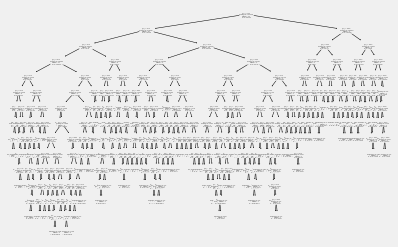

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(rfr.estimators_[0], out_file ='rfr-1.dot',
               feature_names = ['Open', 'High', 'Low']) 

from graphviz import Source
temp = '/content/rfr-1.dot'
s = Source.from_file(temp, format="pdf")
s.view()
#autsave-to-pdf-and-png

from sklearn import tree
tree.plot_tree(rfr.estimators_[0])

In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = rfr.predict([[655,	670,	665]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  665.975


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
y_pred = rfr.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1158.650000,1150.0
1,1138.750000,1140.0
2,1132.850000,1135.0
3,1126.526667,1125.0
4,1128.790833,1135.0
...,...,...
154,1146.800000,1145.0
155,1138.100000,1150.0
156,1141.650000,1150.0
157,1166.200000,1145.0


##Features OHLC + makro + mikro + VIX

In [ ]:
def RandomForestModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Random Forest Regressor model. 
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Predict the stock price using the Random Forest Regressor model 
    preds_rfr =  rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_rfr)
    rmse = sqrt(mean_squared_error(y_test, preds_rfr))
    mae = mean_absolute_error(y_test, preds_rfr)
    r2 = r2_score(y_test, preds_rfr)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_rfr, rfr, variables, X_test, y_test

In [ ]:
train_index, mse, rmse, mae, r2, preds_rfr2, rfr, variables, X_test, y_test = RandomForestModel(series)

X_train (636, 13)
y_train (636,)
X_test (159, 13)
y_test (159,)


MAE = 15.880188679245279
MSE = 538.7125943396227
RMSE = 23.210182988068464
R-Squared Score = 0.7811064887207713


In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


[Text(0.5962160832642917, 0.96875, 'X[1] <= 907.5\nsquared_error = 15973.854\nsamples = 402\nvalue = 816.014'),
 Text(0.32002123032311514, 0.90625, 'X[1] <= 777.5\nsquared_error = 5165.496\nsamples = 321\nvalue = 766.216'),
 Text(0.11883802816901408, 0.84375, 'X[1] <= 687.5\nsquared_error = 887.396\nsamples = 155\nvalue = 702.319'),
 Text(0.02568351284175642, 0.78125, 'X[1] <= 655.0\nsquared_error = 167.122\nsamples = 37\nvalue = 659.655'),
 Text(0.006628003314001657, 0.71875, 'X[0] <= 642.5\nsquared_error = 154.545\nsamples = 6\nvalue = 640.0'),
 Text(0.0033140016570008283, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 620.0'),
 Text(0.009942004971002486, 0.65625, 'X[5] <= 6129111.5\nsquared_error = 6.25\nsamples = 5\nvalue = 647.5'),
 Text(0.006628003314001657, 0.59375, 'squared_error = 0.0\nsamples = 3\nvalue = 650.0'),
 Text(0.013256006628003313, 0.59375, 'squared_error = 0.0\nsamples = 2\nvalue = 645.0'),
 Text(0.04473902236951118, 0.71875, 'X[2] <= 652.5\nsquared_error = 58

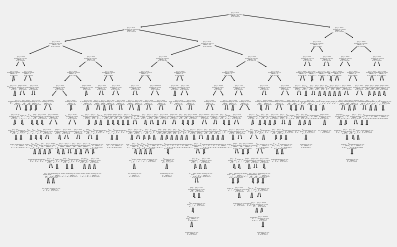

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(rfr.estimators_[0], out_file ='rfr-2.dot',
               feature_names = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER']) 

from graphviz import Source
temp = '/content/rfr-2.dot'
s = Source.from_file(temp, format="pdf")
s.view()
#autsave-to-pdf-and-png

from sklearn import tree
tree.plot_tree(rfr.estimators_[0])

In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = rfr.predict([[655.0,	670.0,	655.0,	3.371739,	14034.0,	5.935133e+06,	12.87,	14.18,	12.87,	13.94,	-0.36745,	-0.062321,	-39.189042]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  660.8


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
y_pred = rfr.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1162.30,1150.0
1,1150.40,1140.0
2,1147.10,1135.0
3,1145.75,1125.0
4,1146.35,1135.0
...,...,...
154,1123.60,1145.0
155,1119.25,1150.0
156,1121.40,1150.0
157,1130.45,1145.0


##Features OHLC + makro + mikro + VIX + Sentiment

In [ ]:
def RandomForestModel(dataset):
    """
    This function takes in a dataframe and predicts the stock price using
    Linear Regression model. The function returns the predicted stock
    price and the mean absolute error. It also plots the predicted stock price
    and the actual stock price. 
    """
    variables = ['Open', 'High', 'Low', 'Close', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']
    dataset = dataset[variables]

    # Note : 2013-12-18 until 2022-09-30 
    # ROT: 90-10
    # Split the data into train and test. 
    train_index = int(0.8 * len(dataset))
    train = dataset[:train_index]
    test = dataset[train_index:]

    # Split the data into features and target.
    X_train = train[variables].drop(['Close'], axis=1)
    y_train = train['Close']
    X_test = test[variables].drop(['Close'], axis=1)
    y_test = test['Close']

    print("X_train", X_train.shape)
    print("y_train", y_train.shape)
    print("X_test", X_test.shape)
    print("y_test", y_test.shape)

    # # Scaling data
    # scaler = MinMaxScaler()
    # x_train_scaled = scaler.fit_transform(X_train)
    # X_train = pd.DataFrame(x_train_scaled)
    # x_test_scaled = scaler.fit_transform(X_test)
    # X_test = pd.DataFrame(x_test_scaled)

    ###############################################################################

    # Create a Random Forest Regressor model. 
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Predict the stock price using the Random Forest Regressor model 
    preds_rfr =  rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, preds_rfr)
    rmse = sqrt(mean_squared_error(y_test, preds_rfr))
    mae = mean_absolute_error(y_test, preds_rfr)
    r2 = r2_score(y_test, preds_rfr)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return train_index, mse, rmse, mae, r2, preds_rfr, rfr, variables, X_test, y_test

In [ ]:
train_index, mse, rmse, mae, r2, preds_rfr3, rfr, variables, X_test, y_test = RandomForestModel(series)

X_train (636, 16)
y_train (636,)
X_test (159, 16)
y_test (159,)


MAE = 15.468238993710685
MSE = 518.495172955975
RMSE = 22.770489080298102
R-Squared Score = 0.7893213743614222


In [ ]:
df.head(1)

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.87,14.18,12.87,13.94,-0.36745,-0.062321,-39.189042,0.927577,0.927577,0.927577


[Text(0.5818928207739308, 0.96875, 'X[2] <= 902.5\nsquared_error = 18436.257\nsamples = 409\nvalue = 831.918'),
 Text(0.30085285132382894, 0.90625, 'X[1] <= 767.5\nsquared_error = 5324.214\nsamples = 333\nvalue = 774.3'),
 Text(0.10672097759674135, 0.84375, 'X[1] <= 687.5\nsquared_error = 956.678\nsamples = 139\nvalue = 696.962'),
 Text(0.03014256619144603, 0.78125, 'X[1] <= 657.5\nsquared_error = 193.89\nsamples = 43\nvalue = 658.984'),
 Text(0.009775967413441956, 0.71875, 'X[2] <= 617.5\nsquared_error = 108.277\nsamples = 12\nvalue = 643.095'),
 Text(0.006517311608961304, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 620.0'),
 Text(0.013034623217922607, 0.65625, 'X[4] <= 14078.0\nsquared_error = 22.608\nsamples = 11\nvalue = 646.944'),
 Text(0.006517311608961304, 0.59375, 'X[13] <= 0.83\nsquared_error = 4.688\nsamples = 3\nvalue = 653.75'),
 Text(0.003258655804480652, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 650.0'),
 Text(0.009775967413441956, 0.53125, 'squared_erro

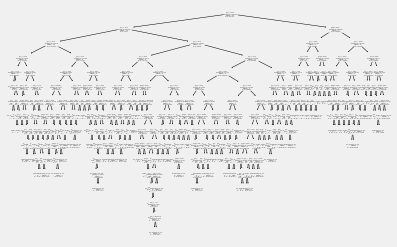

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(rfr.estimators_[0], out_file ='rfr-3.dot',
               feature_names = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM']) 

from graphviz import Source
temp = '/content/rfr-3.dot'
s = Source.from_file(temp, format="pdf")
s.view()
#autsave-to-pdf-and-png

from sklearn import tree
tree.plot_tree(rfr.estimators_[0])

In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = rfr.predict([[655.0,	670.0,	655.0,	3.371739,	14034.0,	5.935133e+06,	12.87,	14.18,	12.87,	13.94,	-0.36745,	-0.062321,	-39.189042,0.927577,	0.927577,	0.927577]])
  
# print the predicted price
print("Predicted Close: ", float(y_pred)) 

Predicted Close:  661.05


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
y_pred = rfr.predict(X_test)
df_pred = pd.DataFrame(y_pred, columns=['Test_Prediction'])
df_y_test = pd.DataFrame(y_test, columns=['Close'])
df_y_test = df_y_test.reset_index()
df_pred['Close'] = df_y_test['Close']
df_pred

,Test_Prediction,Close
0,1165.70,1150.0
1,1151.25,1140.0
2,1147.05,1135.0
3,1146.60,1125.0
4,1148.30,1135.0
...,...,...
154,1130.00,1145.0
155,1119.95,1150.0
156,1123.25,1150.0
157,1132.35,1145.0


# Create a graph of predictive results

In [ ]:
# Test data
# Create a graph of predictive results
train_baseline = series[:train_index + 1]
test_baseline = series[train_index:]
test_baseline['Close RFR'] = preds_linreg
test_baseline['Close RFR2'] = preds_linreg2
test_baseline['Close RFR3'] = preds_linreg3


trace1 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close'],
    mode = 'lines',
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR'],
    mode='lines',
    line = dict(width = 1, dash = 'dashdot'),
    name = 'Predicted Linear Regression OHLC'
)
trace3 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR2'],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted Linear Regression OHLC + makro + mikro + VIX'
)
trace4 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR3'],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted Linear Regression OHLC + makro + mikro + VIX + Sentiment'
)

layout = go.Layout(
  title = "Stock Price PredictionRandom Forest",
  xaxis = {'title' : "Date"},
  yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, 
                      trace2, 
                      trace3, trace4], layout=layout)
fig.show()

In [ ]:
# Test data
# Create a graph of predictive results
train_baseline = series[:train_index + 1]
test_baseline = series[train_index:]
test_baseline['Close RFR'] = preds_rfr
test_baseline['Close RFR2'] = preds_rfr2
test_baseline['Close RFR3'] = preds_rfr3


trace1 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close'],
    mode = 'lines',
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR'],
    mode='lines',
    line = dict(width = 1, dash = 'dashdot'),
    name = 'Predicted RFR OHLC'
)
trace3 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR2'],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted RFR OHLC + makro + mikro + VIX'
)
trace4 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR3'],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted RFR OHLC + makro + mikro + VIX + Sentiment'
)

layout = go.Layout(
  title = "Stock Price PredictionRandom Forest",
  xaxis = {'title' : "Date"},
  yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, 
                      trace2, 
                      trace3, trace4], layout=layout)
fig.show()

In [ ]:
# Test data
# Create a graph of predictive results
train_baseline = series[:train_index + 1]
test_baseline = series[train_index:]
test_baseline['Close RFR'] = preds_rfr
test_baseline['Close Linreg'] = preds_linreg


trace1 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close'],
    mode = 'lines',
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close RFR'],
    mode='lines',
    line = dict(width = 1, dash = 'dashdot'),
    name = 'Predicted RFR'
)
trace3 = go.Scatter(
    x = test_baseline.index,
    y = test_baseline['Close Linreg'],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted Linreg'
)

layout = go.Layout(
  title = "Stock Price Prediction Random Forest with Baseline ML Model",
  xaxis = {'title' : "Date"},
  yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, 
                      trace2, 
                      trace3], layout=layout)
fig.show()

In [ ]:
# Display result prediction
test_baseline

,Date,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM,Close RFR,Close Linreg
636,2022-03-06,1170.0,1175.0,1145.0,1150.0,2.285556,14390.666667,7.813851e+06,24.910000,25.959999,24.760000,24.790001,0.847603,0.063475,22.931108,0.881947,0.881947,0.881947,1158.650000,1155.242515
637,2022-03-07,1150.0,1150.0,1130.0,1140.0,2.317778,14411.000000,7.815302e+06,24.385001,24.939999,23.220000,23.370001,0.835293,0.063563,23.723353,0.747963,0.747963,0.747963,1138.750000,1132.908396
638,2022-03-08,1140.0,1145.0,1125.0,1135.0,2.350000,14394.000000,7.816753e+06,23.860001,23.920000,21.680000,21.950001,0.822983,0.063652,24.515598,0.833130,0.833130,0.833130,1132.850000,1129.560902
639,2022-03-09,1135.0,1140.0,1120.0,1125.0,2.382222,14371.000000,7.818204e+06,25.652501,26.235000,23.775000,24.405001,0.810673,0.063741,25.307843,0.708237,0.708237,0.708237,1126.526667,1124.632092
640,2022-03-10,1125.0,1135.0,1120.0,1135.0,2.414444,14298.000000,7.819655e+06,27.445001,28.550000,25.869999,26.860001,0.798363,0.063829,26.100088,0.950632,0.950632,0.950632,1128.790833,1123.230221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029,1146.800000,1144.711639
791,2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134,1138.100000,1138.380959
792,2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826,1141.650000,1141.364145
793,2022-10-26,1150.0,1165.0,1145.0,1145.0,5.950000,15247.000000,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.921665,0.921665,0.921665,1166.200000,1152.438775
